<a href="https://colab.research.google.com/github/harpreet-kaur87/Machine_Learning/blob/main/bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction :

The banking sector is a cornerstone of any country's economy, serving as a vital component for financial stability and growth. Among the myriad challenges faced by banks, one of the paramount concerns is customer retention. In an era of fierce competition, understanding and predicting customer churn is crucial for banks to proactively manage customer relationships, enhance satisfaction, and maintain a stable and thriving customer base.

# Problem Statement :

This analysis revolves around a comprehensive dataset obtained from Kaggle, encompassing the customers information of ABC Multinational Bank. The dataset encapsulates 14 features, with a mix of categorical and numerical variables. The primary objective is to leverage this dataset to develop a predictive model for customer churn. Customer churn, in this context, refers to the phenomenon where account holders discontinue their engagement with the bank.

Dataset : https://www.kaggle.com/datasets/rangalamahesh/bank-churn?select=train.csv¶
Shape of Dataframe : (165034, 14)

In [ ]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/bank_train.csv')

In [ ]:
# first five observations
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
#shape of dataframe
df.shape

(165034, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
# statistical summary of data
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
#null values in dataframe
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# distribution of target feature
df.Exited.value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

In [ ]:
# percentage of churned customers
churned_customers = 34921
total_customers = 130113

churn_percentage = (churned_customers / total_customers) * 100
print(churn_percentage)

26.838978426444704


<Axes: xlabel='Exited', ylabel='count'>

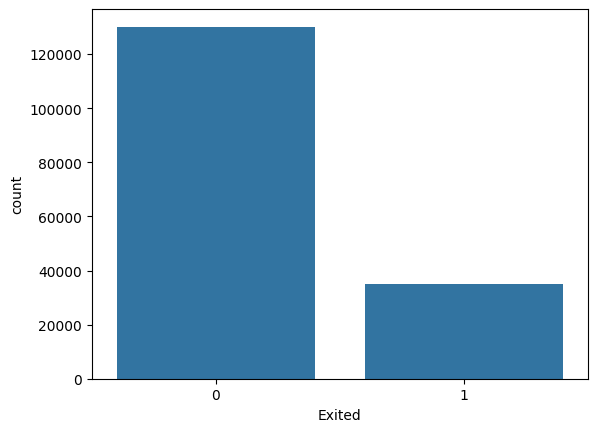

In [ ]:
# countplot representing the churned customers
sns.countplot(df, x='Exited')

<Axes: xlabel='Gender', ylabel='count'>

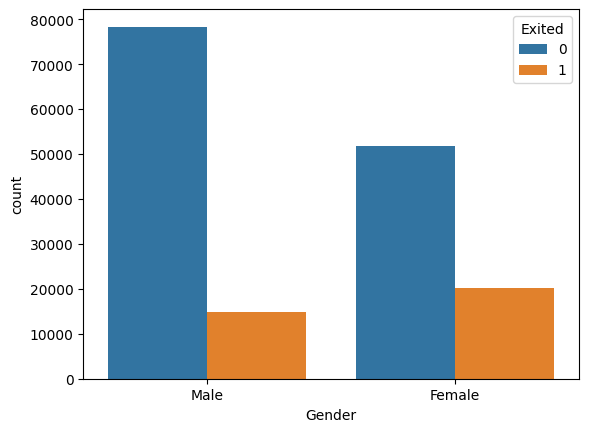

In [ ]:
# The count plot indicates a little bit higher rate of churn among female customers compared to male customers in bank.
sns.countplot(df, x='Gender', hue='Exited')

<Axes: xlabel='Geography', ylabel='count'>

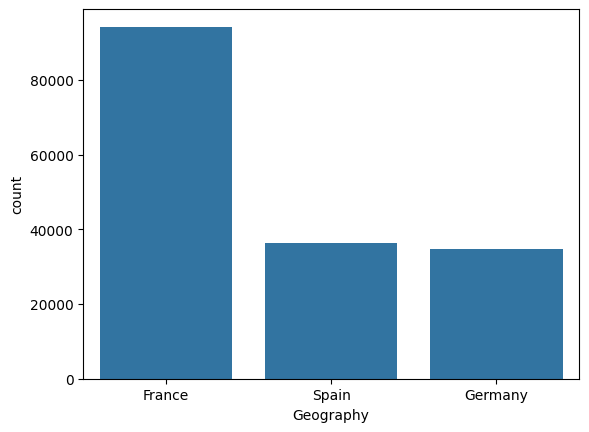

In [ ]:
# The primary customer base is located in France, with Spain and Germany following closely in terms of geography.
sns.countplot(df, x='Geography')

<Axes: xlabel='Geography', ylabel='count'>

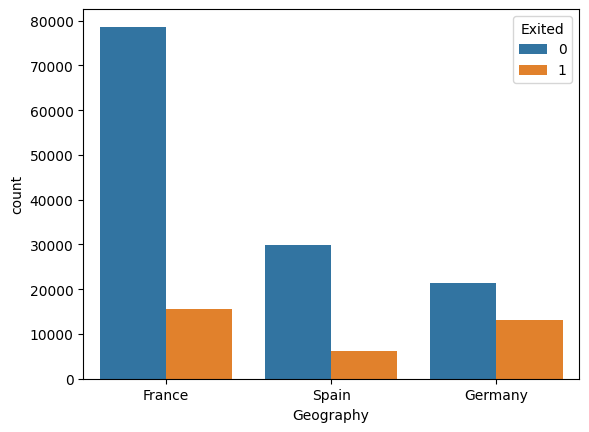

In [ ]:
# The predominant customer churn is observed in France, with Germany and Spain following as the subsequent contributors in terms of geographical impact.
sns.countplot(df, x='Geography', hue='Exited')

## Outlier Detection

<Axes: ylabel='CreditScore'>

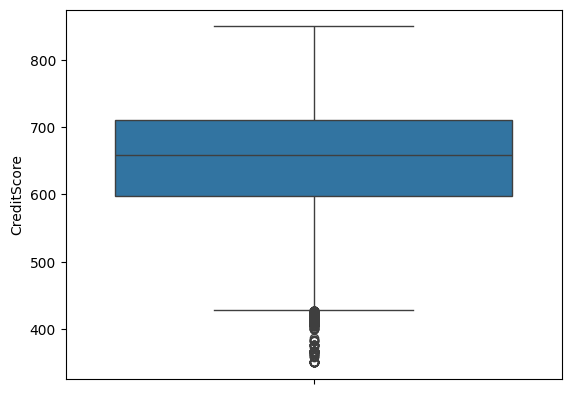

In [ ]:
sns.boxplot(df['CreditScore'])

<Axes: ylabel='Age'>

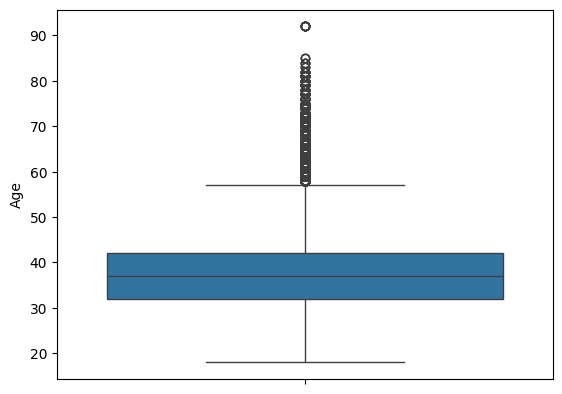

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
#lenght of dataframe before outliar detection
len(df)

165034

In [ ]:
col = ['Age','CreditScore']

In [ ]:
def remove_outliers(df,col):
  for column in col:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    iqr = Q3 - Q1

    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

In [ ]:
df = remove_outliers(df,col)

In [ ]:
# lenght of dataframe after outlier detection
len(df)

158400

## Correlation between features

<Axes: >

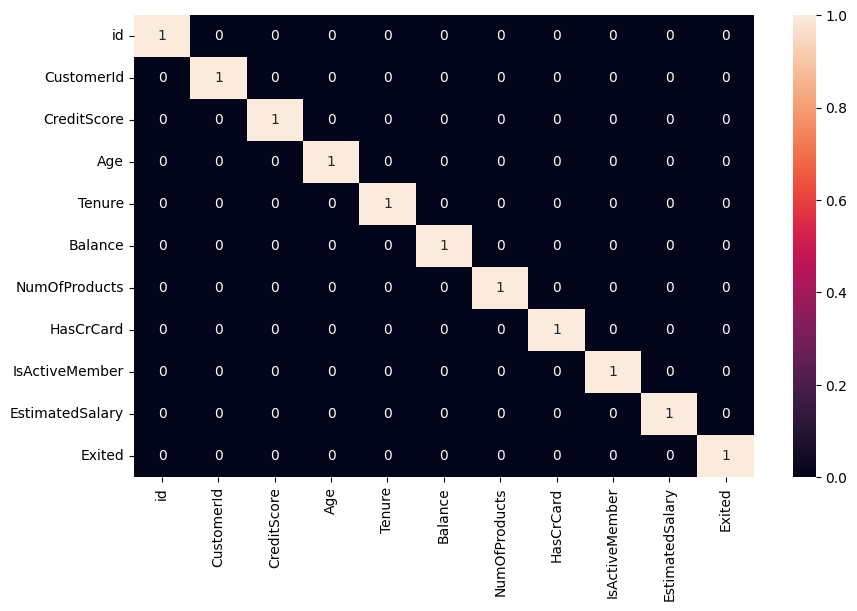

In [ ]:
# heatmap to check the correlation between features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() > 0.9, annot=True)

#Machine Learning Approach

In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female' : 1})

In [ ]:
df['Geography'] = df['Geography'].replace({'France' : 0, 'Spain': 1, 'Germany' : 2})

In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,0,0,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,0,0,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,0,0,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,1,0,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
X = df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
Y = df['Exited']
X.shape,Y.shape

((158400, 10), (158400,))

In [ ]:
# splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((126720, 10), (31680, 10))

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scalar =  StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC(kernel='rbf')
dc = DecisionTreeClassifier()

In [ ]:
for model in (lr,rfc,svc,dc):
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    accuracy_score_on_test_data = accuracy_score(Y_test,y_pred)
    print(f'{model} --> {accuracy_score_on_test_data}')
    print(classification_report(Y_test,y_pred))
    print(confusion_matrix(Y_test,y_pred))
    print()

LogisticRegression() --> 0.8464962121212121
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     25271
           1       0.71      0.40      0.52      6409

    accuracy                           0.85     31680
   macro avg       0.79      0.68      0.71     31680
weighted avg       0.83      0.85      0.83     31680

[[24225  1046]
 [ 3817  2592]]

RandomForestClassifier() --> 0.8653724747474747
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     25271
           1       0.73      0.54      0.62      6409

    accuracy                           0.87     31680
   macro avg       0.81      0.74      0.77     31680
weighted avg       0.86      0.87      0.86     31680

[[23968  1303]
 [ 2962  3447]]

SVC() --> 0.867834595959596
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     25271
           1       0.78      0.49      0.60      6409

# k-fold Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
for model in (lr,rfc,svc,dc):
  cross_validation_result = cross_val_score(model,X,Y,cv=kf)
  print(f'{model} - {cross_validation_result}')
  print(f'Mean Accuracy of {model} - {cross_validation_result.mean()}')
  print()

LogisticRegression() - [0.8051452  0.80369318 0.79002525 0.80372475 0.80132576]
Mean Accuracy of LogisticRegression() - 0.8007828282828282

RandomForestClassifier() - [0.86584596 0.8603851  0.85874369 0.86205808 0.86155303]
Mean Accuracy of RandomForestClassifier() - 0.8617171717171717

SVC() - [0.79769571 0.79734848 0.79002525 0.79614899 0.79558081]
Mean Accuracy of SVC() - 0.7953598484848485

DecisionTreeClassifier() - [0.80214646 0.80189394 0.79659091 0.79523359 0.80006313]
Mean Accuracy of DecisionTreeClassifier() - 0.7991856060606061



#Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'n_estimators' : [100,200,500],
    'criterion' : ['gini','entropy'],
    'max_depth' : [5,10,20],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'random_state' :[42,None]
}

In [ ]:
random_search_rfc = RandomizedSearchCV(rfc,param_grid,cv=5,n_iter=20)

In [ ]:
random_search_rfc.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500],
                                        'random_state': [42, None]})

In [ ]:
print(f'Best parameters - {random_search_rfc.best_params_}')
print(f'Best score - {random_search_rfc.best_score_}')

Best parameters - {'random_state': 42, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}
Best score - 0.8660905934343435


In [ ]:
param_grid_lr = {
            'penalty':['l1','l2'],
            'solver' :['liblinear','saga'],
            'C':[0.001,0.01,0.1,1,10,100],
            'fit_intercept':[True,False],
            'max_iter' : [100,200,300]
        }

In [ ]:
random_search_lr = RandomizedSearchCV(lr,param_grid_lr,cv=5,n_iter=20)

In [ ]:
random_search_lr.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']})

In [ ]:
print(f'Best parameters - {random_search_lr.best_params_}')
print(f'Best score - {random_search_lr.best_score_}')

Best parameters - {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'fit_intercept': True, 'C': 10}
Best score - 0.8430397727272728


# Conclusion :

1. This project investigated customer churn prediction for a bank using random forest, support vector machine (SVM), logistic regression, and decision tree models implemented in Python with libraries like pandas, scikit-learn, and matplotlib.
2. Random forest and SVM achieved the highest accuracy of 87%.
3. Logistic regression also performed well at 84%, while the decision tree attained 80% accuracy. K-fold cross-validation revealed mean accuracies of 80% for logistic regression, decision tree, and support vector classifier, and 87% for the random forest classifier.
4. These results highlight the potential of machine learning for customer churn prediction in the banking industry.
5. Following hyperparameter tuning, the random forest classifier achieved an accuracy of 87%, while logistic regression achieved 84%.